# Revisão de Métricas Comumente utilizadas em Machine Learning


## Validação Cruzada

Através da validação cruzada, diferentes partes do dataset são utilizadas para treino e teste do modelo. Utilizadndo várias divisões do dataset, a validação cruzada treina e testa o modelo em todos os dados disponíveis, e fornece uma estimativa boa sobre a generalização do modelo. Se trata de uma abordagem muito indicada para quando se possui poucos dados.

O **k-fold** se trata de um método de validação cruzada, em que o dataset de treino é dividido em k diferentes grupos, sem sobreposição ou reposição. Para o ajuste do modelo, 1 desses k grupos é destacado para validação, e os (k-1) demais são utilizados para treino.

Durante o treinamento do modelo, a cada iteração o grupo de validação vai se alternado com os grupos de treino, de forma que o modelo é treinado e validado com todos os dados disponíveis. Ao final, após o ajuste do modelo, a performance do modelo como um todo é dado pela performance média em todos os k-folds (média de cada modelo ou cada iteração).

Ilustração abaixo: https://medium.com/turing-talks/turing-talks-10-introdu%C3%A7%C3%A3o-%C3%A0-predi%C3%A7%C3%A3o-a75cd61c268d


Para esse TP, foi solicitado fixar o k-fold em 5.

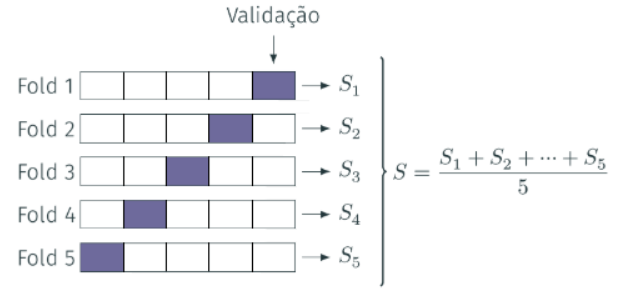

## Acurácia

A acurácia é uma forma de avaliação do desempenho de um modelo de classificação, baseado no número de acertos do modelo sobre seu total.

$Acurácia = \frac{acertos}{total}$

Usualmente é performada nos dados de treino e de teste separadamente. 

Em modelos de classifação binária, em que só existem as classes 0 ou 1 (acerto/erro), é importante separar os tipos de erros e tipos de acerto do modelo. Existem 4 casos possíves:

* Verdadeiro Positivo (TP): Modelo prediz verdadeiro e é verdadeiro
* Verdadeiro Negativo (TN): Modelo prediz falso e é falso
* Falso Positivo (FP): Modelo prediz verdadeiro mas é falso
* Falso Negativo (FN): Modelo prediz negativo mas é positivo

Esses casos são geralmente dispostos em uma matriz de confusão, que mostra os tipos de classificação possíveis (figura abaixo)

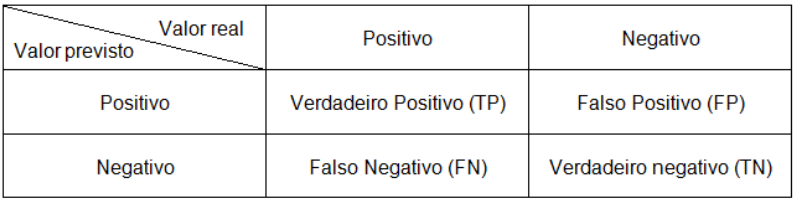

Com essa matriz, podemos expandir a compreensão da acurácia, reescrevendo:

$Acurácia = \frac{acertos}{total} =
 \frac{TP + TN}{TP + TN + FP + FN} $

## Precisão - Precision

Considerando o que foi descrito para a acurácia, a medida de precisão é relacionada aos acertos do modelo ao classificar os dados como positivo.

Por estar olhando apenas para os exemplos classificados como positivos, e por estarmos interessados na medida de acertos, podemos calcular a precisão através da fórmula:

$ p = \frac{TP}{TP + FP} $

Ou seja, dos valores identificados como positivos, quantos eram de fato positivos?

Se não houverem falsos positivos

 $TP + FP = TP$ e

 $p=1$

Se somente houverem falsos positivos

$TP = 0$ e 

$p=0$

## Revocação - Recall

A revogação se trata da habilidade do modelo de identificar os exemplos positivos. Para isso, a fórmula leva em consideração os valores de TP e FN, que compõe todo o conjunto dos positivos, sejam eles corretamente classificados (TP) ou não identificados como positivos (FN).

Seu cálculo se dá pela fórmula:

$ r = \frac{TP}{TP + FN} $

Ou seja, de todos os valores positivos, quantos foram identificados?

Se não houverem falsos negativos, todos foram identificados

 $TP + FP = TP$ e

 $r=1$

Se nenhum real positivo for identificado, todos os positivos caem no campo de falso negativo, portanto

$TP = 0$ e 

$r=0$

## F1

A medida de F1 se trata de uma média harmônica entre a revogação e a precisão. Seu valor varia entre 0 (ruim) e 1 (ótimo).

Seu valor pode ser obtido por:

$F_{1} = \frac{2pr}{p + r} $


Um bom desempenho de F1 depende tanto de uma boa precisão quanto de uma boa revogação, uma vez que se um deles for muito baixo, F1 será também baixo.

## Curva ROC

A curva ROC (Receiver Operating Characteristic) é uma curva composta pelo plot da taxa de verdadeiros positivos (TPR - True Positive Rate / Recall) $versus$ a taxa de falsos positivos (FPR - False Positive Rate).

$TPR = \frac{TP}{TP+FN}$ - explicada em Recall

$FPR = \frac{FP}{FP+TN}$ - Proporção de negativos que foram classificados como positivos sobre o total de negativos

Muitos modelos de classificação binária geram em suas saídas um número a partir do qual se compara com um limite/divisória, e se considera como verdadeiro ou falso se o valor obtido for maior ou menor que esse limite.

A curva ROC é obtida ao plotar o TPR $versus$ FPR variando o limite de separação de classes. 

Essa ideia, apesar de parecer estranha, é importante quando estamos tratando de dados sensíveis, como por exemplo, classificar pacientes suspeitos de estarem com COVID entre infectados e não infectados. É mais importante que o modelo seja capaz de classificar corretamente todos os infectados, e sugerir o isolamento, mesmo que isso aumente o número de falsos positivos, já que uma pessoa não doente se isolar oferece menor risco social que uma pessoa doente classificada como não doente. E para "enviesar" essa classificação dos dados, o limite adotado pelo modelo pode ser variado.

Ao variar os limites de decisão do modelo, são geradas novas matrizes de confusão. Ao invés de analisar várias dessas matrizes, a curva ROC seve como um resumo dos valores obtidos.

### AUC

AUC (Area Under -ROC- Curve). Juntamente à Curva ROC, o conceito de AUC utilizado para compreender a habilidade do modelo de classificar corretamente os dados. 

É a área sob a curva ROC, utilizada para comparar diferentes curvas ROC. As curvas que apresentarem a maior área sob o gráfico, indicam melhor performance do modelo. Então, calculando a AUC para dois modelos, por exemplo, Naive Bayes e NN, podemos ver qual obteve melhor desempenho para aquele conjunto de dados.